## Importing Libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import re
import random
import seaborn as sns 

## Reading Dataset

In [ ]:
df = pd.read_csv('/content/sample_data/CGdataset.csv')
col = ['roll_no','cg3','rollno','cg4']
df.columns = col 

In [ ]:
df

,roll_no,cg3,rollno,cg4
0,2K18/AE/003,4.64,2K18/AE/003,7.45
1,2K18/AE/004,4.55,2K18/AE/004,5.82
2,2K18/AE/005,7.64,2K18/AE/005,7.36
3,2K18/AE/006,9.27,2K18/AE/006,9.82
4,2K18/AE/007,6.91,2K18/AE/007,7.18
...,...,...,...,...
1541,2K18/SE/133,6.55,2K18/SE/133,6.82
1542,2K18/SE/135,7.09,2K18/SE/135,7.45
1543,2K18/SE/136,7.55,2K18/SE/136,9.09
1544,2K18/SE/137,7.91,2K18/SE/137,8.91


## Droping null values 

In [ ]:
print(df.dropna(how='any'))
df = df.dropna(how='any')

          roll_no   cg3       rollno   cg4
0     2K18/AE/003  4.64  2K18/AE/003  7.45
1     2K18/AE/004  4.55  2K18/AE/004  5.82
2     2K18/AE/005  7.64  2K18/AE/005  7.36
3     2K18/AE/006  9.27  2K18/AE/006  9.82
4     2K18/AE/007  6.91  2K18/AE/007  7.18
...           ...   ...          ...   ...
1541  2K18/SE/133  6.55  2K18/SE/133  6.82
1542  2K18/SE/135  7.09  2K18/SE/135  7.45
1543  2K18/SE/136  7.55  2K18/SE/136  9.09
1544  2K18/SE/137  7.91  2K18/SE/137  8.91
1545  2K18/SE/138  1.64  2K18/SE/138  2.50

[1530 rows x 4 columns]


## Droping rows with cg less than 1 in either one of the semester 

In [ ]:
df_less = df[(df['cg3']<1) | (df['cg4']<1) ]
print(type(df_less))
df_less

<class 'pandas.core.frame.DataFrame'>


,roll_no,cg3,rollno,cg4


In [ ]:
df_less = df[(df['cg3']<1) | (df['cg4']<1) ].index
print(type(df_less))
print(df_less)

<class 'pandas.core.indexes.numeric.Int64Index'>
Int64Index([67, 88, 157, 580, 594, 714, 738, 840, 851, 858, 863, 990], dtype='int64')


In [ ]:
# function to drop 
for i in df_less:
    df = df.drop(i)

## Visualization  

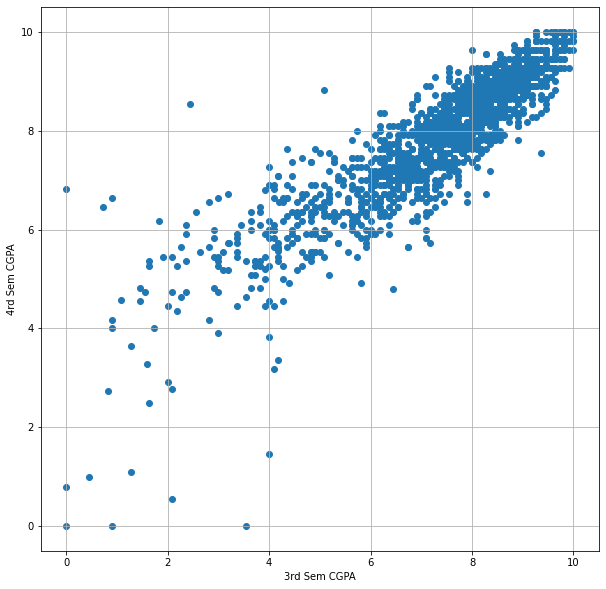

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(df['cg3'],df['cg4'])
plt.xlabel('3rd Sem CGPA')
plt.ylabel('4rd Sem CGPA')

plt.grid()
plt.show()

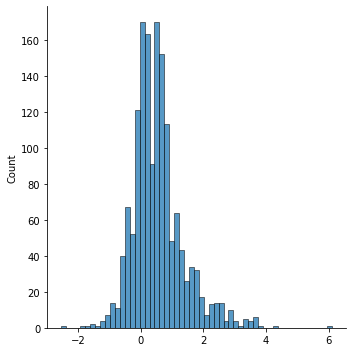

In [ ]:
sns.displot(df['cg4']- df['cg3'])

## Spliting into Training and Testing split

In [ ]:
from sklearn.model_selection import train_test_split

X = df['cg3']
y = df['cg4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1071,) (459,) (1071,) (459,)


## Gradient Decent 

In [ ]:
def gradient_descent(x, y_expected, epochs=1000, learning_rate=0.0001):
    global w,b
    w = random.uniform(0, 1)
    b = random.uniform(0, 1)

    N = x.shape[0]
    cost = []
    for i in range(epochs):
        y_current = w * x + b
        cost.append(np.sum((y_expected - y_current) ** 2) / N)
        w_gradient = - 2 / N * np.sum(2 * (y_expected - y_current) * x)
        b_gradient = - 2 / N * np.sum(2 * (y_expected - y_current))

        w = w - (learning_rate * w_gradient)
        b = b - (learning_rate * b_gradient)

    return w, b, cost

In [ ]:
def predict_grades():
    
    x, y = df['cg3'], df['cg4']
    
    w, b, costs = gradient_descent(x, y, epochs=1000, learning_rate=0.008)
    
    plt.figure(figsize=(10,10))

    plt.plot(costs,'.')
    plt.title('Cost')
    plt.xlabel('Epoch number')
    plt.ylabel('Cost value')
    plt.grid()
    plt.show()
    
    x_plot = np.arange(0, 10, 0.1)
    y_plot = x_plot*w+b
    
    plt.figure(figsize=(10,10))

    plt.plot(X_train, y_train, '.', x_plot, y_plot, '-')
    plt.xlabel('CGPA 3rd Sem')
    plt.ylabel('CGPA 4th Sem')
    plt.legend(['Score points', 'Linear regression'])
    plt.grid()
    plt.show()


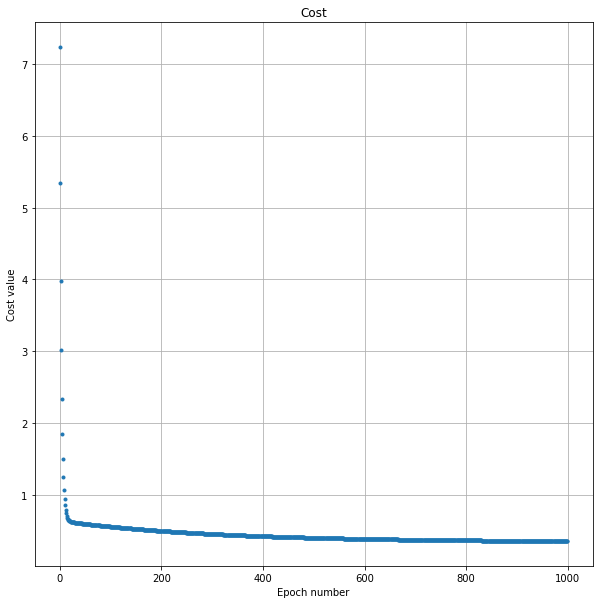

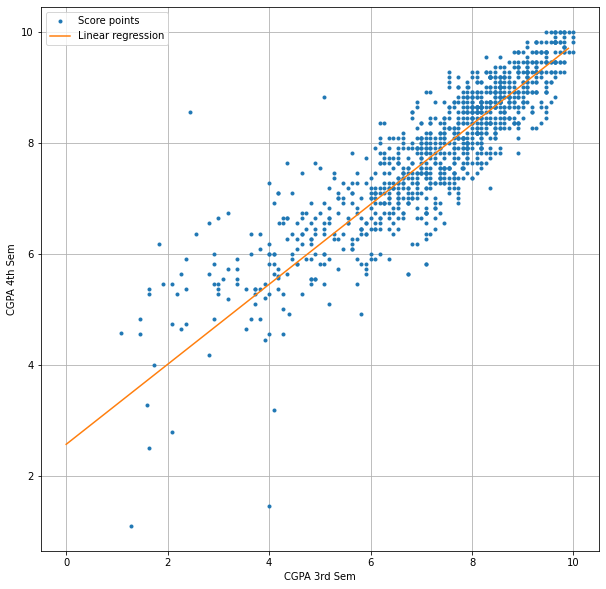

In [ ]:
predict_grades()

In [ ]:
print('Slope of the line is: ',w,'\n','Y intercept is: ',b)

Slope of the line is:  0.7210415558915944 
 Y intercept is:  2.5646287769219227


In [ ]:
df_pre =  pd.DataFrame(y_test)
y_pre = X_test*w + b
df_pre['CG4 Predicted'] = y_pre
df_pre

,cg4,CG4 Predicted
60,9.64,9.054003
1046,8.91,8.073386
267,9.18,9.054003
605,8.00,7.547026
1283,6.18,6.364518
...,...,...
8,7.45,7.417238
604,8.00,7.806601
244,8.00,8.657430
496,8.45,8.397855


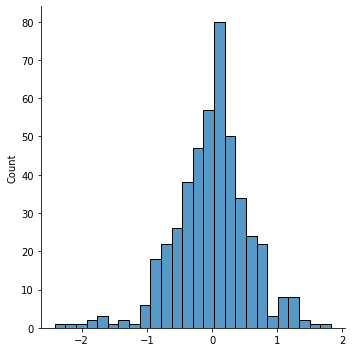

In [ ]:
sns.displot(y_test-y_pre)

## Performance Measures

In [ ]:
from sklearn import metrics

In [ ]:
print()
print('Mean Square Error:     ', metrics.mean_squared_error(y_test, y_pre))
print()
print('R2 Score:              ', metrics.r2_score(y_test,y_pre))


Mean Square Error:      0.3276117157624255

R2 Score:               0.7986940885264974


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('MAPE is:- ',mean_absolute_percentage_error(y_test,y_pre))

MAPE is:-  5.9577807155890925


In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pre) / y_test)), axis=0))
print('RMSPE is:-',rmspe*100)

RMSPE is:- 9.091398214974204


In [ ]:
mbe = (y_test-y_pre).mean()
print('MBE is:-',mbe)

MBE is:- -0.005404459018809616
